In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#loading the data
carData = pd.read_csv('CarPrice_Assignment.csv')
#carData.head(5)

In [56]:
carData.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [57]:
carData.symboling.describe()


def symbol_map(x):
    return x.map({'-3': 7, "-2": 6, "-1": 5, "0": 4, "1": 5, "2": 6, "3": 7})

# Applying the function to the housing list
carData.symboling = carData.symboling.astype(str)



In [58]:
symBolvalue = carData.pop('symboling')
symBolvalueDf = pd.DataFrame(symBolvalue)
symBolvalue.head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: object

In [59]:
symBolvalueDf= symBolvalueDf.apply(symbol_map)


In [60]:

carData = pd.concat([symBolvalueDf, carData], axis=1, join='inner')


In [61]:
symBolvalueDf.head(5)

,symboling
0,7
1,7
2,5
3,6
4,6


In [62]:
# Data Preparation

carData['CarName'] = carData.CarName.apply(lambda x : x.split(" "))
carData['CarName'] = carData.CarName.apply(lambda x : x[0])
carData = carData.replace('porcshce','porsche')
carData = carData.replace('toyouta','toyota')
carData = carData.replace('vokswagen','volkswagen')

carData['CarName'].value_counts()



toyota         32
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
renault         2
maxda           2
mercury         1
Nissan          1
Name: CarName, dtype: int64

In [63]:
carData = pd.get_dummies(carData, prefix_sep='_', drop_first=True)

# Building the Model using RFE Technique

In [64]:
df_train,df_test= train_test_split(carData,train_size=0.7,random_state = 100)

In [65]:
scaler = MinMaxScaler()
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','boreratio','stroke','compressionratio','peakrpm','citympg','highwaympg','price']
df_train[num_vars] =scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,5,123,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0,0,0,1,0,0,0,0,0,0
125,7,126,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0,0,0,0,0,0,0,1,0,0
166,5,167,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
1,7,2,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,1,0,0
199,5,200,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,1,0,0


In [66]:
y_train = df_train.pop('price')
X_train =df_train
print(X_train.shape)

(143, 68)


In [67]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [69]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [70]:
#X_train.columns[~rfe.support_]

In [71]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [72]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [73]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.03e-70
Time:                        19:24:56   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2770      0.038     -7.337      0.000      -0.352      -0.202
carwidth                  0.3471      0.063      5.548      0.000       0.223       0.471
curbweight                0.3785      0.075      5.048      0.000       0.230       0.527
enginesize                1.2372      0.159      7.786      0.000       0.923       1.552
boreratio                -0.3581      0.054     -6.662      0.000      -0.464      -0.252
stroke                   -0.2639      0.047     -5.666      0.000      -0.356      -0.172
CarName_bmw               0.2821      0.027     10.632      0.000       0.230       0.335
CarName_peugeot          -0.1091      0.027     -4.115      0.000      -0.162      -0.057
CarName_porsche           0.1779      0.045      3.965      0.000       0.089       0.267
enginelocation_rear       0.3506      0.075      4.700      0.000       0.203       0.498
enginetype_rotor          0.2383      0.033      7.193      0.000       0.173       0.304
cylindernumber_five       0.1581      0.033      4.819      0.000       0.093       0.223
cylindernumber_four       0.2259      0.039      5.819      0.000       0.149       0.303
cylindernumber_three      0.4553      0.075      6.095      0.000       0.307       0.603
cylindernumber_twelve    -0.4461      0.098     -4.553      0.000      -0.640      -0.252
cylindernumber_two        0.2383      0.033      7.193      0.000       0.173       0.304
==============================================================================
Omnibus:                       22.727   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.186
Skew:                           0.769   Prob(JB):                     5.10e-09
Kurtosis:                       5.011   Cond. No.                     1.27e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,enginetype_rotor,inf
15,cylindernumber_two,inf
0,const,65.22
3,enginesize,27.43
12,cylindernumber_four,13.23
2,curbweight,11.40
1,carwidth,6.06
4,boreratio,5.63
14,cylindernumber_twelve,3.05
11,cylindernumber_five,2.91


In [75]:
#enginetype_rotor is having high VIF

X_train_rfe = X_train_rfe.drop(['enginetype_rotor'],axis=1)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.03e-70
Time:                        19:24:57   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2770      0.038     -7.337      0.000      -0.352      -0.202
carwidth                  0.3471      0.063      5.548      0.000       0.223       0.471
curbweight                0.3785      0.075      5.048      0.000       0.230       0.527
enginesize                1.2372      0.159      7.786      0.000       0.923       1.552
boreratio                -0.3581      0.054     -6.662      0.000      -0.464      -0.252
stroke                   -0.2639      0.047     -5.666      0.000      -0.356      -0.172
CarName_bmw               0.2821      0.027     10.632      0.000       0.230       0.335
CarName_peugeot          -0.1091      0.027     -4.115      0.000      -0.162      -0.057
CarName_porsche           0.1779      0.045      3.965      0.000       0.089       0.267
enginelocation_rear       0.3506      0.075      4.700      0.000       0.203       0.498
cylindernumber_five       0.1581      0.033      4.819      0.000       0.093       0.223
cylindernumber_four       0.2259      0.039      5.819      0.000       0.149       0.303
cylindernumber_three      0.4553      0.075      6.095      0.000       0.307       0.603
cylindernumber_twelve    -0.4461      0.098     -4.553      0.000      -0.640      -0.252
cylindernumber_two        0.4766      0.066      7.193      0.000       0.345       0.608
==============================================================================
Omnibus:                       22.727   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.186
Skew:                           0.769   Prob(JB):                     5.10e-09
Kurtosis:                       5.011   Cond. No.                         69.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.22
3,enginesize,27.43
11,cylindernumber_four,13.23
2,curbweight,11.40
1,carwidth,6.06
4,boreratio,5.63
14,cylindernumber_two,5.46
13,cylindernumber_twelve,3.05
10,cylindernumber_five,2.91
5,stroke,2.46


In [77]:
#enginesize is having high VIF

X_train_rfe = X_train_rfe.drop(['enginesize'],axis=1)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           5.01e-61
Time:                        19:24:57   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1639      0.042     -3.890      0.000      -0.247      -0.081
carwidth                  0.3765      0.076      4.985      0.000       0.227       0.526
curbweight                0.6404      0.081      7.902      0.000       0.480       0.801
boreratio                -0.0908      0.050     -1.815      0.072      -0.190       0.008
stroke                   -0.0281      0.043     -0.656      0.513      -0.113       0.057
CarName_bmw               0.2672      0.032      8.351      0.000       0.204       0.331
CarName_peugeot          -0.1489      0.031     -4.731      0.000      -0.211      -0.087
CarName_porsche           0.1596      0.054      2.945      0.004       0.052       0.267
enginelocation_rear       0.4270      0.089      4.775      0.000       0.250       0.604
cylindernumber_five      -0.0102      0.030     -0.342      0.733      -0.069       0.049
cylindernumber_four      -0.0051      0.030     -0.170      0.866      -0.065       0.055
cylindernumber_three      0.1933      0.081      2.397      0.018       0.034       0.353
cylindernumber_twelve     0.1524      0.073      2.075      0.040       0.007       0.298
cylindernumber_two        0.0454      0.044      1.032      0.304      -0.042       0.132
==============================================================================
Omnibus:                       21.617   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.220
Skew:                           0.641   Prob(JB):                     1.52e-10
Kurtosis:                       5.439   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#cylindernumber_four is having high p value

X_train_rfe = X_train_rfe.drop(['cylindernumber_four'],axis=1)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           4.72e-62
Time:                        19:24:57   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1691      0.029     -5.853      0.000      -0.226      -0.112
carwidth                  0.3784      0.074      5.089      0.000       0.231       0.526
curbweight                0.6489      0.063     10.242      0.000       0.524       0.774
boreratio                -0.0955      0.041     -2.304      0.023      -0.177      -0.013
stroke                   -0.0298      0.041     -0.720      0.473      -0.112       0.052
CarName_bmw               0.2694      0.029      9.193      0.000       0.211       0.327
CarName_peugeot          -0.1515      0.027     -5.586      0.000      -0.205      -0.098
CarName_porsche           0.1609      0.053      3.009      0.003       0.055       0.267
enginelocation_rear       0.4305      0.087      4.969      0.000       0.259       0.602
cylindernumber_five      -0.0084      0.028     -0.302      0.763      -0.063       0.046
cylindernumber_three      0.2001      0.070      2.867      0.005       0.062       0.338
cylindernumber_twelve     0.1515      0.073      2.076      0.040       0.007       0.296
cylindernumber_two        0.0500      0.034      1.453      0.149      -0.018       0.118
==============================================================================
Omnibus:                       21.645   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.814
Skew:                           0.637   Prob(JB):                     1.13e-10
Kurtosis:                       5.463   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#cylindernumber_five is having high p value

X_train_rfe = X_train_rfe.drop(['cylindernumber_five'],axis=1)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           4.37e-63
Time:                        19:24:57   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1678      0.028     -5.892      0.000      -0.224      -0.111
carwidth                  0.3696      0.068      5.419      0.000       0.235       0.505
curbweight                0.6499      0.063     10.310      0.000       0.525       0.775
boreratio                -0.0927      0.040     -2.302      0.023      -0.172      -0.013
stroke                   -0.0293      0.041     -0.711      0.478      -0.111       0.052
CarName_bmw               0.2702      0.029      9.298      0.000       0.213       0.328
CarName_peugeot          -0.1499      0.026     -5.660      0.000      -0.202      -0.098
CarName_porsche           0.1633      0.053      3.098      0.002       0.059       0.268
enginelocation_rear       0.4273      0.086      4.988      0.000       0.258       0.597
cylindernumber_three      0.1981      0.069      2.862      0.005       0.061       0.335
cylindernumber_twelve     0.1547      0.072      2.151      0.033       0.012       0.297
cylindernumber_two        0.0506      0.034      1.479      0.142      -0.017       0.118
==============================================================================
Omnibus:                       22.405   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.286
Skew:                           0.654   Prob(JB):                     3.27e-11
Kurtosis:                       5.529   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#stroke is having high p value

X_train_rfe = X_train_rfe.drop(['stroke'],axis=1)

lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           4.72e-64
Time:                        19:24:58   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1828      0.019     -9.527      0.000      -0.221      -0.145
carwidth                  0.3631      0.067      5.382      0.000       0.230       0.497
curbweight                0.6418      0.062     10.374      0.000       0.519       0.764
boreratio                -0.0820      0.037     -2.199      0.030      -0.156      -0.008
CarName_bmw               0.2720      0.029      9.413      0.000       0.215       0.329
CarName_peugeot          -0.1483      0.026     -5.630      0.000      -0.200      -0.096
CarName_porsche           0.1644      0.053      3.126      0.002       0.060       0.268
enginelocation_rear       0.4282      0.085      5.008      0.000       0.259       0.597
cylindernumber_three      0.1987      0.069      2.875      0.005       0.062       0.335
cylindernumber_twelve     0.1673      0.070      2.405      0.018       0.030       0.305
cylindernumber_two        0.0502      0.034      1.468      0.145      -0.017       0.118
==============================================================================
Omnibus:                       22.096   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.356
Skew:                           0.664   Prob(JB):                     1.42e-10
Kurtosis:                       5.419   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#cylindernumber_two is having high p value

X_train_rfe = X_train_rfe.drop(['cylindernumber_two'],axis=1)

lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.09e-64
Time:                        19:24:58   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1826      0.019     -9.475      0.000      -0.221      -0.144
carwidth                  0.3680      0.068      5.437      0.000       0.234       0.502
curbweight                0.6354      0.062     10.252      0.000       0.513       0.758
boreratio                -0.0785      0.037     -2.099      0.038      -0.152      -0.005
CarName_bmw               0.2707      0.029      9.332      0.000       0.213       0.328
CarName_peugeot          -0.1500      0.026     -5.679      0.000      -0.202      -0.098
CarName_porsche           0.1605      0.053      3.043      0.003       0.056       0.265
enginelocation_rear       0.4301      0.086      5.010      0.000       0.260       0.600
cylindernumber_three      0.1978      0.069      2.851      0.005       0.061       0.335
cylindernumber_twelve     0.1666      0.070      2.384      0.019       0.028       0.305
==============================================================================
Omnibus:                       20.602   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.955
Skew:                           0.639   Prob(JB):                     2.11e-09
Kurtosis:                       5.253   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.73
2,curbweight,5.38
1,carwidth,4.89
3,boreratio,1.88
6,CarName_porsche,1.80
7,enginelocation_rear,1.62
5,CarName_peugeot,1.16
4,CarName_bmw,1.07
9,cylindernumber_twelve,1.07
8,cylindernumber_three,1.06


In [83]:
#cylindernumber_two is having high p value

X_train_rfe = X_train_rfe.drop(['curbweight'],axis=1)

lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     85.93
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           5.62e-49
Time:                        19:24:58   Log-Likelihood:                 146.59
No. Observations:                 143   AIC:                            -275.2
Df Residuals:                     134   BIC:                            -248.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2446      0.024    -10.029      0.000      -0.293      -0.196
carwidth                  0.9278      0.053     17.408      0.000       0.822       1.033
boreratio                 0.0405      0.047      0.855      0.394      -0.053       0.134
CarName_bmw               0.3276      0.038      8.629      0.000       0.252       0.403
CarName_peugeot          -0.1224      0.035     -3.494      0.001      -0.192      -0.053
CarName_porsche           0.0274      0.068      0.402      0.688      -0.107       0.162
enginelocation_rear       0.6184      0.112      5.531      0.000       0.397       0.840
cylindernumber_three      0.2381      0.092      2.578      0.011       0.055       0.421
cylindernumber_twelve     0.2737      0.092      2.971      0.004       0.092       0.456
==============================================================================
Omnibus:                       27.439   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.831
Skew:                           0.812   Prob(JB):                     1.68e-13
Kurtosis:                       5.691   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#cylindernumber_two is having high p value

X_train_rfe = X_train_rfe.drop(['CarName_porsche'],axis=1)

lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     98.79
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           5.90e-50
Time:                        19:24:59   Log-Likelihood:                 146.51
No. Observations:                 143   AIC:                            -277.0
Df Residuals:                     135   BIC:                            -253.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2473      0.023    -10.600      0.000      -0.293      -0.201
carwidth                  0.9305      0.053     17.654      0.000       0.826       1.035
boreratio                 0.0447      0.046      0.969      0.334      -0.046       0.136
CarName_bmw               0.3264      0.038      8.652      0.000       0.252       0.401
CarName_peugeot          -0.1245      0.035     -3.605      0.000      -0.193      -0.056
enginelocation_rear       0.6440      0.092      7.027      0.000       0.463       0.825
cylindernumber_three      0.2401      0.092      2.612      0.010       0.058       0.422
cylindernumber_twelve     0.2713      0.092      2.961      0.004       0.090       0.453
==============================================================================
Omnibus:                       26.006   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.854
Skew:                           0.774   Prob(JB):                     1.23e-12
Kurtosis:                       5.609   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#cylindernumber_two is having high p value

X_train_rfe = X_train_rfe.drop(['boreratio'],axis=1)

lr = sm.OLS(y_train, X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           8.36e-51
Time:                        19:24:59   Log-Likelihood:                 146.01
No. Observations:                 143   AIC:                            -278.0
Df Residuals:                     136   BIC:                            -257.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2383      0.021    -11.148      0.000      -0.281      -0.196
carwidth                  0.9579      0.044     21.536      0.000       0.870       1.046
CarName_bmw               0.3298      0.038      8.786      0.000       0.256       0.404
CarName_peugeot          -0.1194      0.034     -3.500      0.001      -0.187      -0.052
enginelocation_rear       0.6618      0.090      7.372      0.000       0.484       0.839
cylindernumber_three      0.2392      0.092      2.603      0.010       0.057       0.421
cylindernumber_twelve     0.2692      0.092      2.939      0.004       0.088       0.450
==============================================================================
Omnibus:                       27.436   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.297
Skew:                           0.781   Prob(JB):                     1.80e-14
Kurtosis:                       5.860   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.18
1,carwidth,1.20
3,CarName_peugeot,1.10
5,cylindernumber_three,1.05
6,cylindernumber_twelve,1.04
2,CarName_bmw,1.01
4,enginelocation_rear,1.00


In [87]:
X_train_rfe.columns

Index(['const', 'carwidth', 'CarName_bmw', 'CarName_peugeot',
       'enginelocation_rear', 'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [88]:
y_train_price = lr.predict(X_train_rfe)

### Residual Analysis

In [89]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

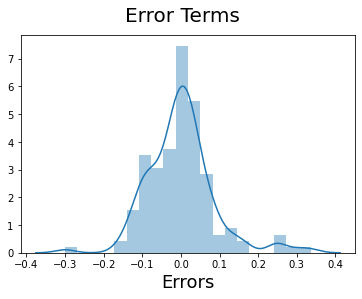

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### The  error terms are normally distributed around mean 0

In [91]:
scaler = MinMaxScaler()
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','boreratio','stroke','compressionratio','peakrpm','citympg','highwaympg','price']
df_test[num_vars] =scaler.fit_transform(df_test[num_vars])
df_test.head()

,symboling,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,4,161,0.265306,0.341732,0.200000,0.346154,0.132148,0.082969,0.515873,0.524590,...,0,0,0,1,0,0,0,0,0,0
186,6,187,0.311953,0.426772,0.315789,0.605769,0.219125,0.131004,0.515873,0.726776,...,0,0,0,0,0,0,0,1,0,0
59,5,60,0.355685,0.522835,0.421053,0.413462,0.271985,0.187773,0.674603,0.721311,...,0,0,0,1,0,0,0,0,0,0
165,5,166,0.230321,0.379528,0.157895,0.307692,0.214320,0.082969,0.555556,0.551913,...,0,0,0,0,0,0,0,1,0,0
140,6,141,0.195335,0.200000,0.136842,0.605769,0.202307,0.126638,0.857143,0.311475,...,0,0,0,1,0,0,0,0,0,0


## Predicting the value of Test Data

In [92]:
y_test = df_test.pop('price')
X_test = df_test

In [93]:
col = X_test.columns[rfe.support_]

X_test_rfe = X_test[col]
import statsmodels.api as sm  
X_test_rfe = sm.add_constant(X_test_rfe)

In [94]:
X_test_rfe = X_test_rfe.drop(["boreratio","CarName_porsche","cylindernumber_two",
                              "stroke","cylindernumber_five","cylindernumber_four","enginetype_rotor","enginesize"], axis = 1)

In [95]:
X_test_rfe = X_test_rfe.drop(["curbweight"], axis = 1)

In [96]:
X_test_rfe.columns

Index(['const', 'carwidth', 'CarName_bmw', 'CarName_peugeot',
       'enginelocation_rear', 'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [97]:
X_train_rfe.columns

Index(['const', 'carwidth', 'CarName_bmw', 'CarName_peugeot',
       'enginelocation_rear', 'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [98]:
X_test.shape

(62, 68)

In [99]:
X_test_rfe.shape

(62, 7)

In [100]:
# Making predictions
y_pred = lr.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

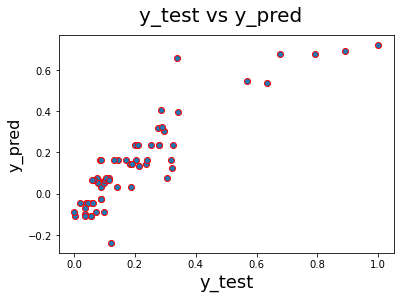

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,edgecolors='r')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [102]:
from sklearn.metrics import r2_score
r2_score( y_pred,y_test)

0.7178537124817821